In [68]:
### Data visualization
import pandas as pd
from pandas import DataFrame

df = pd.read_csv('/home/zan/Downloads/deceptive-opinion.csv')

print(df)

      deceptive             hotel  polarity       source  \
0      truthful            conrad  positive  TripAdvisor   
1      truthful             hyatt  positive  TripAdvisor   
2      truthful             hyatt  positive  TripAdvisor   
3      truthful              omni  positive  TripAdvisor   
4      truthful             hyatt  positive  TripAdvisor   
...         ...               ...       ...          ...   
1595  deceptive  intercontinental  negative        MTurk   
1596  deceptive            amalfi  negative        MTurk   
1597  deceptive  intercontinental  negative        MTurk   
1598  deceptive            palmer  negative        MTurk   
1599  deceptive            amalfi  negative        MTurk   

                                                   text  
0     We stayed for a one night getaway with family ...  
1     Triple A rate with upgrade to view room was le...  
2     This comes a little late as I'm finally catchi...  
3     The Omni Chicago really delivers on all f

In [69]:
df.head(5)
df.isnull().sum() ## No hay valores de tipo missing
df[df.duplicated(keep=False)] ## 803-853, 847-862,  995-1014, 1085-1109
df = df.drop_duplicates() ## Hay cuatro duplicados en el dataset
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


(array([0, 1, 2]),
 [Text(0, 0, 'TripAdvisor'), Text(1, 0, 'MTurk'), Text(2, 0, 'Web')])

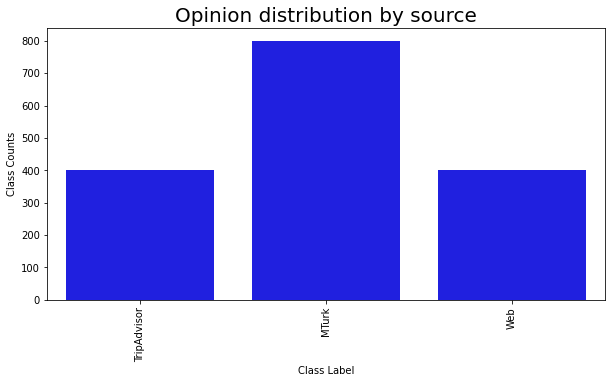

In [70]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x=df.source, color='blue')
plt.title('Opinion distribution by source', fontsize=20)
plt.ylabel('Class Counts', fontsize=10)
plt.xlabel('Class Label', fontsize=10)
plt.xticks(rotation='vertical')

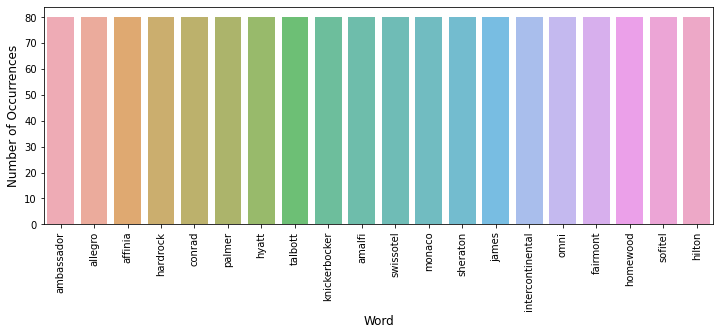

In [71]:
count_occurences = df['hotel'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(count_occurences.index, count_occurences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

(array([0, 1]), [Text(0, 0, 'truthful'), Text(1, 0, 'deceptive')])

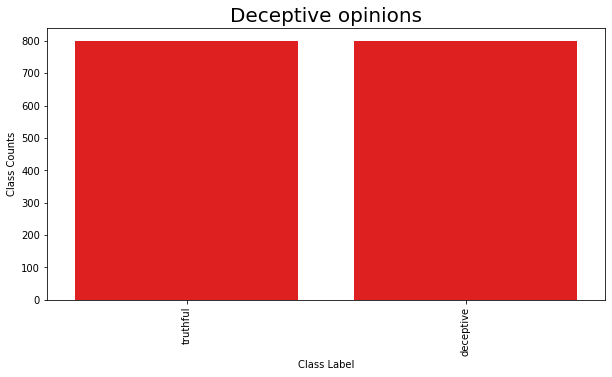

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.deceptive, color='red')
plt.title('Deceptive opinions', fontsize=20)
plt.ylabel('Class Counts', fontsize=10)
plt.xlabel('Class Label', fontsize=10)
plt.xticks(rotation='vertical')

<AxesSubplot:ylabel='polarity,source'>

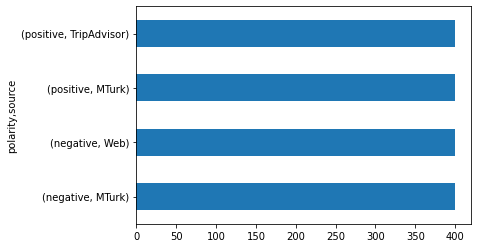

In [73]:
##df.groupby(["polarity", "source"]).size()
df.groupby(['polarity', 'source']).size().plot(kind='barh')

<AxesSubplot:ylabel='deceptive,source'>

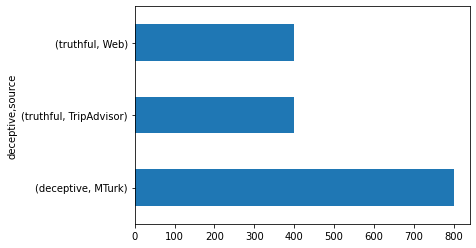

In [74]:
df.groupby(['deceptive', 'source']).size().plot(kind='barh')

In [75]:
df.groupby(['hotel', 'source']).size()

hotel             source     
affinia           MTurk          40
                  TripAdvisor    20
                  Web            20
allegro           MTurk          40
                  TripAdvisor    20
                  Web            20
amalfi            MTurk          40
                  TripAdvisor    20
                  Web            20
ambassador        MTurk          40
                  TripAdvisor    20
                  Web            20
conrad            MTurk          40
                  TripAdvisor    20
                  Web            20
fairmont          MTurk          40
                  TripAdvisor    20
                  Web            20
hardrock          MTurk          40
                  TripAdvisor    20
                  Web            20
hilton            MTurk          40
                  TripAdvisor    20
                  Web            20
homewood          MTurk          40
                  TripAdvisor    20
                  Web            2

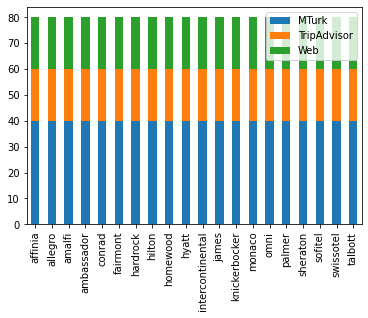

In [76]:
hotels = []
for x in df['hotel'].unique():
    hotels.append(x)
hotels.sort()
source_count = []
for x in df.groupby(['hotel', 'source']).size():
    source_count.append(x)
mturk = source_count[0::3]
tripad = source_count[1::3]
web = source_count[2::3]

df1 = pd.DataFrame({'MTurk':mturk, 'TripAdvisor':tripad, 'Web':web}, index=hotels)

ax = df1.plot.bar(stacked=True)

<AxesSubplot:ylabel='polarity'>

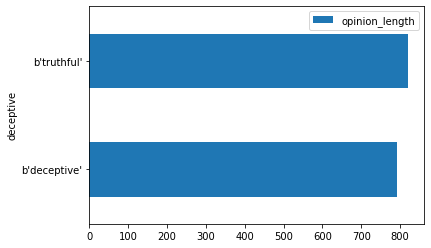

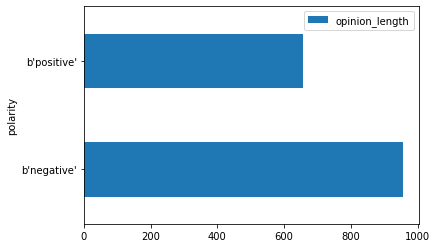

In [77]:
## Plot para ver la relacion entre el tamaño de la opinion y la polaridad/engaño
import numpy as np
opinion_len = []
for ix, row in df.iterrows():
    new_arr = [row['deceptive'], row['polarity'], len(row['text'])]
    opinion_len.append(new_arr)

df3 = pd.DataFrame(list(map(np.ravel, opinion_len)), columns=['deceptive', 'polarity', 'opinion_length'])
df3['deceptive'] = df3['deceptive'].astype('|S')
df3['polarity'] = df3['polarity'].astype('|S')
df3['opinion_length'] = df3['opinion_length'].astype(str).astype(int)

df3.groupby(['deceptive']).mean().plot(kind='barh')
df3.groupby(['polarity']).mean().plot(kind='barh')

In [78]:
## Limpiar texto, opinion del usuario para luego poder convertir la secuencia a vector

from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

df['text'] = df['text'].apply(clean_text)

In [79]:
%matplotlib inline

from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

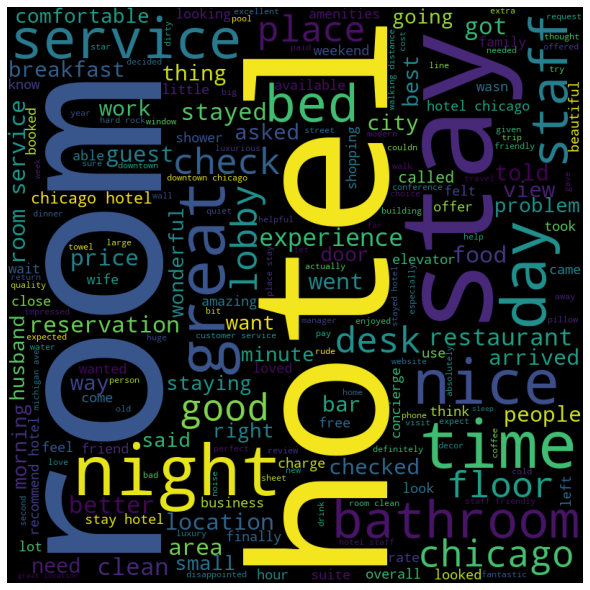

In [80]:
texts = ''
for index, item in df.iterrows():
    texts += ' ' + item['text']
    
plot_word_cloud(texts)

In [81]:
## Limpiar texto, opinion del usuario para luego poder convertir la secuencia a vector con stegmatizacion

from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short,
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

df['text'] = df['text'].apply(clean_text)

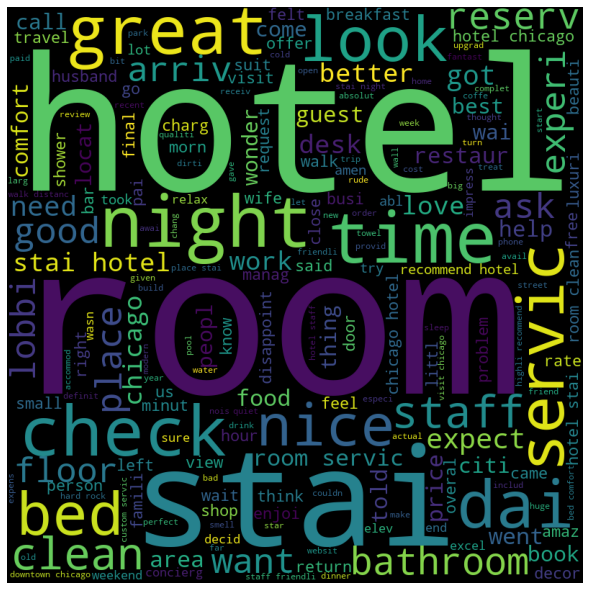

In [83]:
texts = ''
for index, item in df.iterrows():
    texts += ' ' + item['text']
    
plot_word_cloud(texts)

In [82]:
%matplotlib inline

from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [59]:
least_freq = {}

for index, item in df.iterrows():
    for x in item['text'].split():
        if x in least_freq:
            least_freq[x] += 1
        else:
            least_freq[x] = 1
least_freq
least_freq = sorted(least_freq.items(), key=lambda x: x[1])    
list_of_least_freq = []
for x in range(0,20):
    list_of_least_freq.append(least_freq[x][0]) 


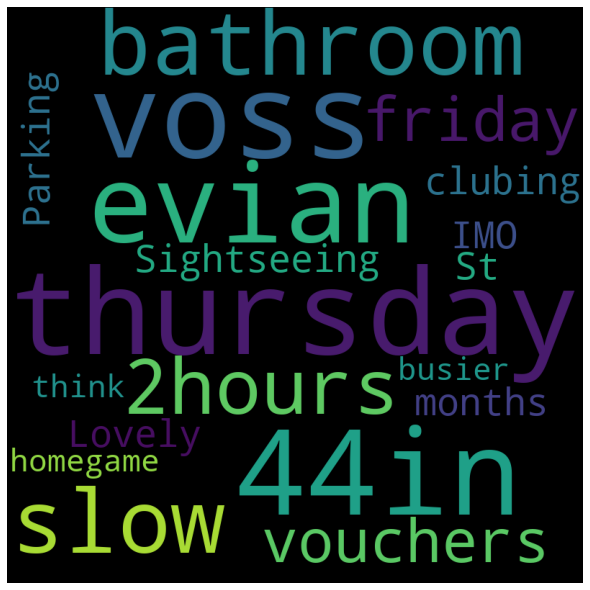

In [60]:
## Generar Word Clouds con las palabras menos frecuentes -- sin limpiar el dataset

import matplotlib.pyplot as plt

unique_string = (" ").join(list_of_least_freq)
wordcloud = WordCloud(width = 800, height = 800).generate(unique_string)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [64]:
## Limpiar texto, opinion del usuario para luego poder convertir la secuencia a vector

from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

df['text'] = df['text'].apply(clean_text)

In [65]:
least_freq = {}

for index, item in df.iterrows():
    for x in item['text'].split():
        if x in least_freq:
            least_freq[x] += 1
        else:
            least_freq[x] = 1
least_freq
least_freq = sorted(least_freq.items(), key=lambda x: x[1])    
list_of_least_freq = []
for x in range(0,20):
    list_of_least_freq.append(least_freq[x][0]) 

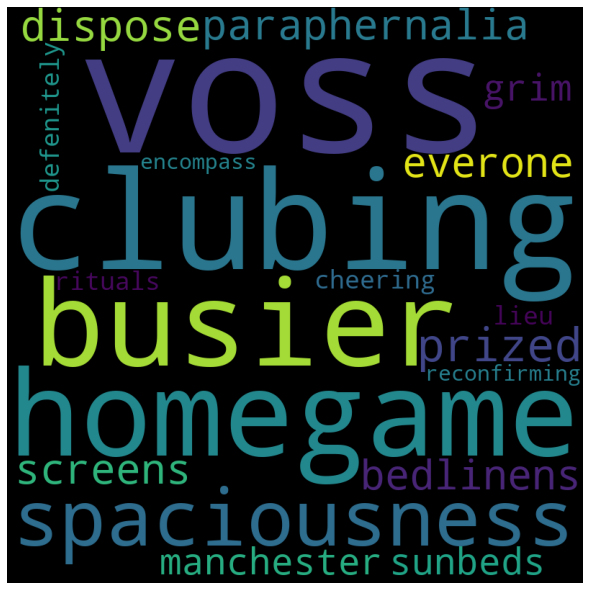

In [66]:
## Generar Word Clouds con las palabras menos frecuentes -- con el dataset limpio

import matplotlib.pyplot as plt

unique_string = (" ").join(list_of_least_freq)
wordcloud = WordCloud(width = 800, height = 800).generate(unique_string)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()